Arushi Nigam

Import Statements

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import pandas as pd
import os
from os import listdir
from zipfile import ZipFile
import random
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

1b(i, ii, iii). and 1c(ii).

In [ ]:
# (Part 1b.ii): Splitting data into 0.7 for train, 0.15 for validation, and remaining for test
splitfolders.ratio('./drive/MyDrive/Data/images', output="output", seed=0, ratio=(.715, 0.16,0.125)) 

Copying files: 1176 files [08:17,  2.36 files/s]


In [26]:
# ------- EfficientNet Special Pre-Processing ----------------

# (Part 1c.ii): Image Augmentation
preprocess = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=35,
    zoom_range=0.4,
    width_shift_range=0.4,
    height_shift_range=0.2)

# (Part 1b.i and 1b.iii): One-hot encoding via class_mode and resizing images into 224x224
train = preprocess.flow_from_directory(
        './output/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val = image_dataset_from_directory('./output/val',
                                    shuffle=False,
                                    label_mode='categorical',
                                    image_size=(224, 224))

test = image_dataset_from_directory('./output/test',
                                    shuffle=False,
                                    label_mode='categorical',
                                    image_size=(224, 224))

# ------- VGG Special Pre-Processing ----------------

# (Part 1c.ii): Image Augmentation
preprocessv = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=35,
    zoom_range=0.4,
    width_shift_range=0.4,
    height_shift_range=0.2)

vandtv = ImageDataGenerator(
    preprocessing_function=preprocess_input,
  )

# (Part 1b.i and 1b.iii): One-hot encoding via class_mode and resizing images into 224x224
trainv = preprocessv.flow_from_directory(
        './output/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

valv = vandtv.flow_from_directory(
        './output/val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

testv = vandtv.flow_from_directory(
        './output/test',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 827 images belonging to 20 classes.
Found 178 files belonging to 20 classes.
Found 171 files belonging to 20 classes.
Found 827 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


1c(iii).

In [ ]:
# ------------ EfficientNet Model -----------------
effnet = EfficientNetB0(include_top=False, weights='imagenet', classes=20)

effmodel = models.Sequential()
effmodel.add(effnet)
effmodel.add(layers.GlobalMaxPooling2D())
effmodel.add(layers.BatchNormalization())
effmodel.add(layers.Dropout(0.2))
effmodel.add(layers.Dense(256, activation='relu'))
effmodel.add(layers.Dense(20, activation='softmax'))

effnet.trainable = False

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

effmodel.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

# ------------ VGG16 Model -----------------
vgg = VGG16(include_top=False, weights='imagenet', classes=20)

vggmodel = models.Sequential()
vggmodel.add(vgg)
vggmodel.add(layers.GlobalMaxPooling2D())
vggmodel.add(layers.BatchNormalization())
vggmodel.add(layers.Dropout(0.2))
vggmodel.add(layers.Dense(256, activation='relu'))
vggmodel.add(layers.Dense(20, activation='softmax'))

vgg.trainable = False

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

vggmodel.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)


1c(iv).

In [ ]:
# ------------ EfficientNet Model -----------------
model_run = effmodel.fit(
  train,
  validation_data=val,
  epochs=100,
  callbacks=[earlystopping]
)

Epoch 1/100
26/26 [==============================] - 19s 529ms/step - loss: 1.6934 - accuracy: 0.5187 - val_loss: 1.2262 - val_accuracy: 0.7584
Epoch 2/100
26/26 [==============================] - 12s 476ms/step - loss: 0.5937 - accuracy: 0.8102 - val_loss: 0.5745 - val_accuracy: 0.8596
Epoch 3/100
26/26 [==============================] - 12s 475ms/step - loss: 0.4383 - accuracy: 0.8694 - val_loss: 0.4986 - val_accuracy: 0.8820
Epoch 4/100
26/26 [==============================] - 12s 474ms/step - loss: 0.3653 - accuracy: 0.8960 - val_loss: 0.3874 - val_accuracy: 0.9157
Epoch 5/100
26/26 [==============================] - 12s 472ms/step - loss: 0.3554 - accuracy: 0.8863 - val_loss: 0.3927 - val_accuracy: 0.9101
Epoch 6/100
26/26 [==============================] - 12s 473ms/step - loss: 0.2661 - accuracy: 0.9202 - val_loss: 0.3766 - val_accuracy: 0.9101
Epoch 7/100
26/26 [==============================] - 12s 478ms/step - loss: 0.2805 - accuracy: 0.9154 - val_loss: 0.3227 - val_accuracy:

<Figure size 432x288 with 0 Axes>

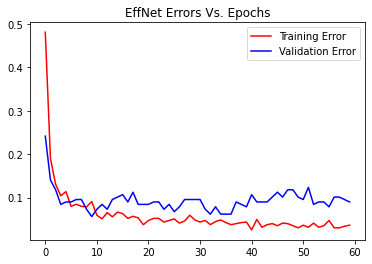

<Figure size 432x288 with 0 Axes>

In [ ]:
# ------------ EfficientNet Model -----------------
accuracies = model_run.history['accuracy']

trainingerror = [];

for acc in accuracies:
  trainingerror.append(1-acc)

valaccuracies = model_run.history['val_accuracy']

valtrainingerror = [];
for acc in valaccuracies:
  valtrainingerror.append(1-acc)

epochs = [];
for i in range(len(trainingerror)):
  epochs.append(i)
  
plt.plot(epochs, trainingerror, 'r', label='Training Error')
plt.plot(epochs, valtrainingerror, 'b', label='Validation Error')
plt.title('EffNet Errors Vs. Epochs')
plt.legend()

plt.figure()

In [ ]:
# ------------ VGG16 Model -----------------
model_runv = vggmodel.fit(
  trainv,
  validation_data=valv,
  epochs=100,
  callbacks=[earlystopping]
)

Epoch 1/100
26/26 [==============================] - 15s 544ms/step - loss: 2.6057 - accuracy: 0.2370 - val_loss: 2.2692 - val_accuracy: 0.5056
Epoch 2/100
26/26 [==============================] - 14s 533ms/step - loss: 1.3548 - accuracy: 0.5937 - val_loss: 0.9179 - val_accuracy: 0.7416
Epoch 3/100
26/26 [==============================] - 14s 534ms/step - loss: 1.0014 - accuracy: 0.7098 - val_loss: 0.7018 - val_accuracy: 0.7697
Epoch 4/100
26/26 [==============================] - 14s 527ms/step - loss: 0.7784 - accuracy: 0.7630 - val_loss: 0.6222 - val_accuracy: 0.8146
Epoch 5/100
26/26 [==============================] - 14s 525ms/step - loss: 0.7012 - accuracy: 0.7848 - val_loss: 0.5820 - val_accuracy: 0.8090
Epoch 6/100
26/26 [==============================] - 14s 528ms/step - loss: 0.6050 - accuracy: 0.8222 - val_loss: 0.5331 - val_accuracy: 0.8371
Epoch 7/100
26/26 [==============================] - 14s 526ms/step - loss: 0.5676 - accuracy: 0.8186 - val_loss: 0.5375 - val_accuracy:

<Figure size 432x288 with 0 Axes>

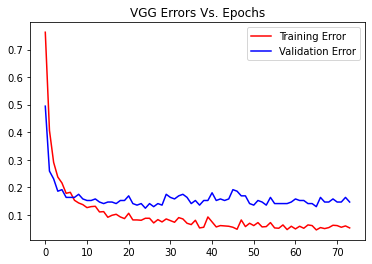

<Figure size 432x288 with 0 Axes>

In [22]:
# ------------ VGG16 Model -----------------
accuracies = model_runv.history['accuracy']

trainingerror = [];
for acc in accuracies:
  trainingerror.append(1-acc)

valaccuracies = model_runv.history['val_accuracy']

valtrainingerror = [];
for acc in valaccuracies:
  valtrainingerror.append(1-acc)

epochs = [];
for i in range(len(trainingerror)):
  epochs.append(i)

plt.plot(epochs, trainingerror, 'r', label='Training Error')
plt.plot(epochs, valtrainingerror, 'b', label='Validation Error')
plt.title('VGG Errors Vs. Epochs')
plt.legend()

plt.figure()

1c(v).

In [ ]:
# ------------ EfficientNet Model -----------------
ypred = np.argmax(effmodel.predict(test), axis=1)

ytrue= tf.concat([y for x, y in test], axis = 0).numpy()
ytrue = np.argmax(ytrue, axis = 1)
print(classification_report(ytrue, ypred))

6/6 [==============================] - 2s 186ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       0.90      1.00      0.95         9
           5       0.82      1.00      0.90         9
           6       1.00      1.00      1.00         9
           7       0.88      0.78      0.82         9
           8       1.00      1.00      1.00         9
           9       0.90      1.00      0.95         9
          10       1.00      0.78      0.88         9
          11       1.00      0.89      0.94         9
          12       0.88      0.78      0.82         9
          13       1.00      0.78      0.88         9
          14       0.70      0.78      0.74         9
          15       0.75      0.75      0.75         8
          16       0.89     

In [27]:
# ------------ VGG16 Model -----------------
ypredv = np.argmax(vggmodel.predict(testv), axis=1)
ytruev = np.argmax(testv.classes, axis=0)
print(classification_report(testv.classes, ypredv))

6/6 [==============================] - 1s 201ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         9
           2       1.00      1.00      1.00         8
           3       1.00      0.75      0.86         8
           4       0.75      0.67      0.71         9
           5       0.80      0.89      0.84         9
           6       1.00      0.89      0.94         9
           7       0.90      1.00      0.95         9
           8       1.00      0.89      0.94         9
           9       0.82      1.00      0.90         9
          10       0.89      0.89      0.89         9
          11       0.78      0.78      0.78         9
          12       0.86      0.67      0.75         9
          13       0.58      0.78      0.67         9
          14       0.70      0.78      0.74         9
          15       0.67      0.75      0.71         8
          16       0.89     

References

https://www.geeksforgeeks.org/reading-image-opencv-using-python/

https://pynative.com/python-random-choice/#h-select-a-random-item-from-a-list

https://stackoverflow.com/questions/56449262/how-to-upload-folders-to-google-colab

https://linuxtut.com/en/540d3be3e570cbca644e/

https://stackoverflow.com/questions/42045362/change-contrast-of-image-in-pil

https://pythonexamples.org/python-pillow-adjust-image-contrast/#3

https://www.geeksforgeeks.org/python-pil-image-resize-method/

https://www.geeksforgeeks.org/python-pil-paste-and-rotate-method/

https://www.geeksforgeeks.org/python-pil-image-crop-method/

https://www.w3schools.com/python/pandas/ref_df_info.asp#:~:text=The%20info()%20method%20prints,method%20actually%20prints%20the%20info.

https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/

https://stackoverflow.com/questions/60034512/cant-show-an-image-using-pil-on-google-colab

https://www.geeksforgeeks.org/python-pil-image-show-method/

https://www.folkstalk.com/tech/resize-multiple-images-to-same-size-python-with-code-examples/

https://stackoverflow.com/questions/30654509/how-to-make-two-different-image-size-equally

https://stackoverflow.com/questions/37584977/translate-image-using-pil

https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

https://github.com/Tony607/efficientnet_keras_transfer_learning/blob/master/Keras_efficientnet_transfer_learning.ipynb

https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac